# Oil Well Reserve Estimation

A mining company is attempting to determine the best location for a new oil well using parameters such as oil quality and volume of reserves. Based on available data, our task is to predict the volume of reserves in order to understand the feasibility of building a well in a particular location.   

In [107]:
#Let's import the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

## Understanding the Data

### Load the Data

Let's load the datasets for the 3 regions.

In [108]:
try:
    geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    print('Unable to load dataset, please check filepath')

In [109]:
try:
    geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    print('Unable to load dataset, please check filepath')

In [110]:
try:
    geo_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    print('Unable to load dataset, please check filepath')

### Summary Statistics and Initial Exploration of the Data

In [111]:
geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [112]:
geo_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


We have no missing values. There are three features that play a role in predicting the volume in the `product` column. The volume is measured in thousands of barrels.

In [113]:
geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [114]:
geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Prepare the Data for Training

In [115]:
def prepare(dataset):
    #breakdown dataset into features and target.
    features = dataset.drop('product',axis = 1).set_index('id')
    target = dataset['product']
    
    #split into training and validation sets. The split we will follow is 75:25.
    features_train, valid_train, features_target, valid_target = train_test_split(features,target,
                                                                                  test_size = 0.25, 
                                                                                  random_state = 12345)
    scaler = StandardScaler()
    scaler.fit(features_train)

    features_train_scaled = scaler.transform(features_train)
    valid_train_scaled = scaler.transform(valid_train)
    
    return features_train, valid_train, features_train_scaled, valid_train_scaled, features_target,valid_target

In [116]:
geo_0_features_train, geo_0_valid_train, geo_0_features_train_scaled, geo_0_valid_train_scaled, geo_0_features_target, geo_0_valid_target = prepare(geo_0)

In [117]:
geo_0_features_train.shape[0]

75000

In [118]:
geo_0_valid_train.shape[0]

25000

The split works! Let's do the same for the 2 other regions.

In [119]:
geo_1_features_train, geo_1_valid_train, geo_1_features_train_scaled, geo_1_valid_train_scaled, geo_1_features_target, geo_1_valid_target = prepare(geo_1)

In [120]:
geo_2_features_train, geo_2_valid_train, geo_2_features_train_scaled, geo_2_valid_train_scaled, geo_2_features_target, geo_2_valid_target = prepare(geo_2)

## Model Training and Predictions

Let's train the model and make predictions. We are using a Linear Regression model.

### Train and Predict

In [121]:
def train_predict(features_train, features_target,valid_train):
    #instantiate the model
    model = LinearRegression()
    
    #train it on the training data
    model.fit(features_train, features_target)
    
    #Predict for validation set
    valid_predictions = model.predict(valid_train)
    
    return valid_predictions

In [122]:
geo_0_valid_predictions = train_predict(geo_0_features_train_scaled,geo_0_features_target,geo_0_valid_train_scaled)

In [123]:
geo_1_valid_predictions = train_predict(geo_1_features_train_scaled,geo_1_features_target,geo_1_valid_train_scaled)

In [124]:
geo_2_valid_predictions = train_predict(geo_2_features_train_scaled,geo_2_features_target,geo_2_valid_train_scaled)

Let's look at the average volume of reserves in each region

In [125]:
print(f'Average Reserves in Geo_0: {geo_0_valid_predictions.mean():.3f} (thousands of barrels)')

Average Reserves in Geo_0: 92.593 (thousands of barrels)


In [126]:
print(f'Average Reserves in Geo_1: {geo_1_valid_predictions.mean():.3f} (thousands of barrels)')

Average Reserves in Geo_1: 68.729 (thousands of barrels)


In [127]:
print(f'Average Reserves in Geo_2: {geo_2_valid_predictions.mean():.3f} (thousands of barrels)')

Average Reserves in Geo_2: 94.965 (thousands of barrels)


### Evaluate the Model

Let's use RMSE to understand how "good" the model is.

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
def error(valid_predictions, valid_target):
    
    mse = mean_squared_error(valid_target,valid_predictions)
    
    return mse ** 0.5

In [130]:
geo_0_error = error(geo_0_valid_target,geo_0_valid_predictions)
print(f'RMSE of Geo_0 predictions: {geo_0_error:.3f} (thousands of barrels)')

RMSE of Geo_0 predictions: 37.579 (thousands of barrels)


In [131]:
geo_1_error = error(geo_1_valid_target,geo_1_valid_predictions)
print(f'RMSE of Geo_1 predictions: {geo_1_error:.3f} (thousands of barrels)')

RMSE of Geo_1 predictions: 0.893 (thousands of barrels)


In [132]:
geo_2_error = error(geo_2_valid_target,geo_2_valid_predictions)
print(f'RMSE of Geo_2 predictions: {geo_2_error:.3f} (thousands of barrels)')

RMSE of Geo_2 predictions: 40.030 (thousands of barrels)


We see that the RMSE is the least in the case of region 1 and the highest in case of region 2.

### Conclusions:
1. We see that the average predicted volume of reserves is highest for Region 2, however, the errors made by our model are also the highest for this region. 
2. Conversely, the model errors for Region 1 are lowest but as is the expected volume. 

## Preparation for Profit Calculation

According to the company: 
1. 1 barrel of raw material generates \\$4.5 of revenue. In case of our data, as the volume is expressed in thousands of barrels, 1 unit of volume is expected to generate \\$4,500 of revenue.
2. When exploring a region, 200 of the most profitable wells are considered.
3. The development of 200 wells costs $100M 

### Modify the data for Profit Calculation

In [148]:
def profit_prep(df,predictions, valid):
    
    predictions = pd.DataFrame(predictions)
    
    predictions['id'] = valid.reset_index()['id']
    
    predictions = predictions.rename(columns = {0:'predicted_volume'})
     
    df = df[['id','product']]
     
    targets = pd.merge(predictions,df,how = 'left').set_index('id')
    
    targets['revenue'] = targets['product'] * 4500
    
    return targets

In [149]:
geo_0_product = profit_prep(geo_0,geo_0_valid_predictions,geo_0_valid_train)

In [150]:
geo_0_product

,predicted_volume,product,revenue
id,,,
7Z2gx,95.894952,10.038645,45173.900878
b2HU8,77.572583,114.551489,515481.698334
Y0dXD,77.892640,132.603635,596716.358660
Mje59,90.175134,169.072125,760824.564704
yqXxU,70.510088,122.325180,550463.310162
...,...,...,...
CzptN,103.037104,170.116726,765525.268508
cT9bJ,85.403255,93.632175,421344.788267
Y7xR6,61.509833,127.352259,573085.163441


In [151]:
geo_1_product = profit_prep(geo_1,geo_1_valid_predictions,geo_1_valid_train)

In [152]:
geo_2_product = profit_prep(geo_2,geo_2_valid_predictions,geo_2_valid_train)

We will consider boootstrapped samples of 500 wells and the top 200 locations out of these and their revenues for each region to estimate total revenue. Before that, let's find out the minimum average volume of reserves needed to turn a profit. The cost to the company is $100M for 200 wells.

### Compute Threshold for Break-Even

In [153]:
total_cost = 100000000
n_wells = 200
revenue_per_unit = 4500
#Let's find out the minimum gross volume needed to cover the costs
volume_needed = total_cost / revenue_per_unit
#Minimum Average volume needed to cover costs
avg_volume_needed = volume_needed / n_wells

print(f'Average volume needed from each well to cover costs is: {avg_volume_needed:.2f} thousands of barrels')

Average volume needed from each well to cover costs is: 111.11 thousands of barrels


None of our regions have such high average volumes overall. However, only need to find the appropriate wells in each region to turn a profit.

## Profit Calculation Function

Let's write a function to calculate the predicted average volume and profit from a region. To this function, we will supply our bootstrapped sample

In [156]:
def volume_profit(df,region, total_cost = 100000000):
    
    
    
    df = df.sort_values(by = 'predicted_volume', ascending = False)
    df = df[:200]
    #Calculate average volume of top 200 wells in our sample
    average = df['product'].mean()

    #print(f'Predicted Average volume of reserves in {region} is {average:.2f}')
    
    #Calculate profit/loss made by utilising these wells
    revenue = df['revenue'].sum()
    
    #print(revenue)
    
    profit = revenue - total_cost
    
    #print(f'Predicted Profit for {region} = {profit:.2f}')
    
    return average, profit

## Profit Calculations

To calculate profit distributions, we will take 1,000 samples of 500 wells and apply the profit caluclation function to them. We will record these profits and observe the distribution.

In [157]:
def profit_distribution(df,region):
    
    
    #iniatilize lists to store profits and volumes.
    profits = []
    volumes = []
    
    n_samples = 1000
    
    #number of observations per sample
    n = 500
    
    #fix a random state
    random_state = np.random.RandomState(12345)
    
    for i in range (0,n_samples):
        
        sample_df = df.sample(n=n, replace = True, random_state = random_state)
        
        volume, profit = volume_profit(sample_df,region = region)
        
        profits.append(profit)
        volumes.append(volume)
        
    return pd.Series(volumes),pd.Series(profits)

In [158]:
vol_0,prof_0 = profit_distribution(geo_0_product,'Region 0')

In [159]:
vol_1,prof_1 = profit_distribution(geo_1_product,'Region 1')

In [160]:
vol_2,prof_2 = profit_distribution(geo_2_product,'Region 1')

### Study by Region

In [165]:
def region_report(profit,volume,region):
    
    #Average Profit and Volume:
    print(f'Average Profit of {region}: ${profit.mean():,.2f} and average volume: {volume.mean():.2f}')
    print('-'*100) 
    
    #95% Confidence Interval
    lower = profit.quantile(0.025)
    upper = profit.quantile(0.975)

    print(f'95% Confidence Interval of Profits for {region} is ${lower:,.2f} to ${upper:,.2f}')
    print('-'*100)
    
    #Probability of Loss
    n_loss = (profit < 0).sum()

    prob_loss = n_loss / len(profit) * 100
    
    print(f'The probability of making a loss in {region} is: {prob_loss:.2f}%')
    print('-'*100)
    
    #Distribution
    profit.plot(kind = 'hist', figsize = (10,8))
    plt.xlabel('Profit in USD')
    plt.ylabel('Number of Samples')
    plt.title(f'Profit Distribution for {region}');

#### Region 0

Average Profit of Region 0: $3,854,187.59 and average volume: 115.39
----------------------------------------------------------------------------------------------------
95% Confidence Interval of Profits for Region 0 is $-1,177,545.85 to $8,800,368.92
----------------------------------------------------------------------------------------------------
The probability of making a loss in Region 0 is: 6.80%
----------------------------------------------------------------------------------------------------


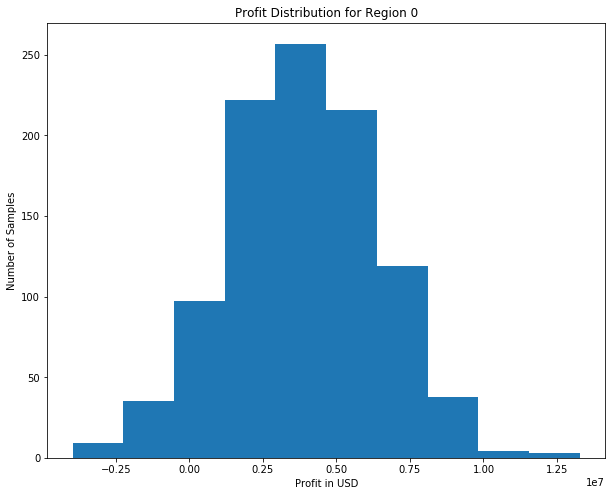

In [166]:
region_report(prof_0,vol_0,'Region 0')

#### Region 1

Average Profit of Region 1: $4,524,965.43 and average volume: 116.14
----------------------------------------------------------------------------------------------------
95% Confidence Interval of Profits for Region 1 is $352,759.85 to $8,851,589.56
----------------------------------------------------------------------------------------------------
The probability of making a loss in Region 1 is: 1.00%
----------------------------------------------------------------------------------------------------


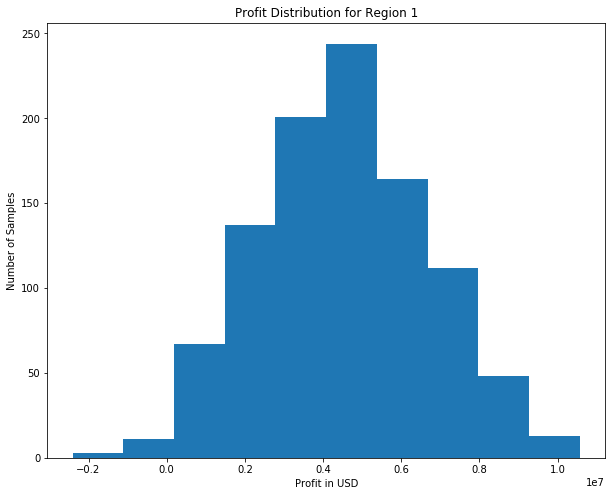

In [167]:
region_report(prof_1,vol_1,'Region 1')

#### Region 2

Average Profit of Region 2: $3,986,546.05 and average volume: 115.54
----------------------------------------------------------------------------------------------------
95% Confidence Interval of Profits for Region 2 is $-1,262,524.22 to $9,006,685.81
----------------------------------------------------------------------------------------------------
The probability of making a loss in Region 2 is: 8.10%
----------------------------------------------------------------------------------------------------


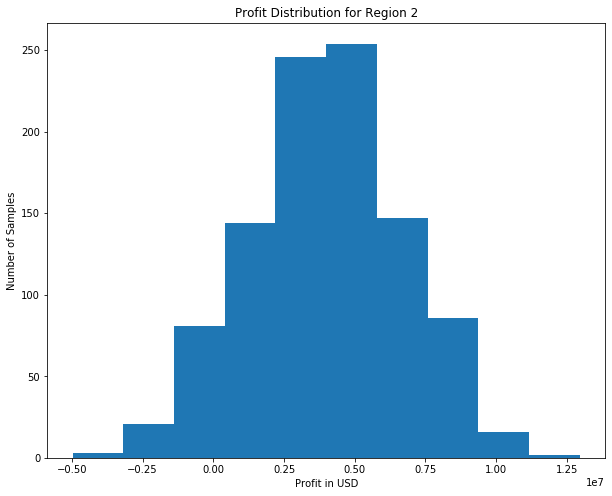

In [168]:
region_report(prof_2,vol_2,'Region 2')

### Conclusions

1. The average profit for our estimations is highest in region 1. 
2. The probability of making a loss is the highest in region 2. 
3. The probability of making a loss is lowest in region 1.
4. The recommended choice is **region 1**.

## Conclusion

### Understading the Data

1. The data has 3 coded features and expected volumes of reserves (in thousands of barrels) for various regions. 

### Preparing the Data

1. We split the data 75:25 into training and validation sets. 
2. We scaled the features. 

### Applying the Models

1. We applied a Linear Regression model to the datasets individually by region
2. We obtained predicted values and RMSE for each region. 
3. The lowest RMSE is for Region 1. 

### Break Even Point

1. We calculated the break-even point for the company. The company will drill 200 wells at a cost of USD100 million. The average volume per well must be 111.11 to cover costs.
2. Each well yeilds USD 4500 of revenue per thousand barrels of production.

### Profit Calculations

1. We calculate the profits for wells in the 3 regions. We utilise bootstrapping to sample 500 wells. We take 1000 samples. 
2. We select 200 top wells out of these samples and calculate the expected average volume and profit as well as a 95% confidence interval and a distribution of the profits. 
3. We also calculate the probability of making a loss by choosing the region.

### Conclusion

1. The company can make highest profits in Region 1. We recommend **region 1** as the ideal location.